In [1]:
import pandas as pd
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


***Pclass*** 1 = 1st, 2 = 2nd, 3 = 3rd; reverse coding might be a god idea <br>
***Age*** creating age groups in ordered categories might be a good idea <br>
***SibSp*** ***Parch*** whether the passenger is traveling with somebody; combining might be an option <br>
***Fare*** is probably hgihly correlated with ***Pclass*** <br>
***Cabin*** ??? <br>
***Embarked*** ???

In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


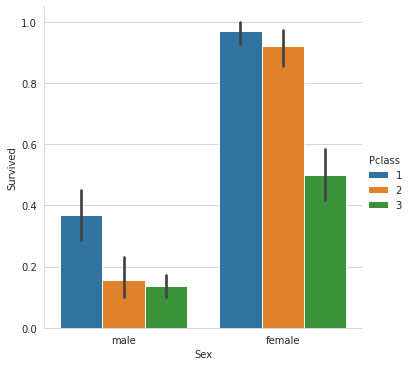

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

In [6]:
df['Pclass'].replace({1:3, 2:2, 3:1}, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


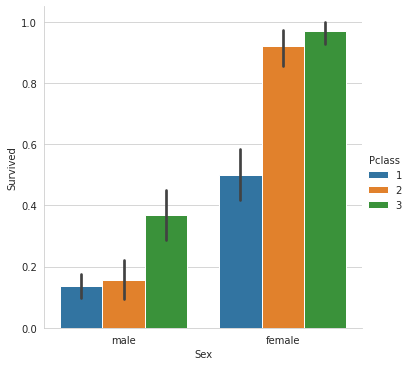

In [7]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

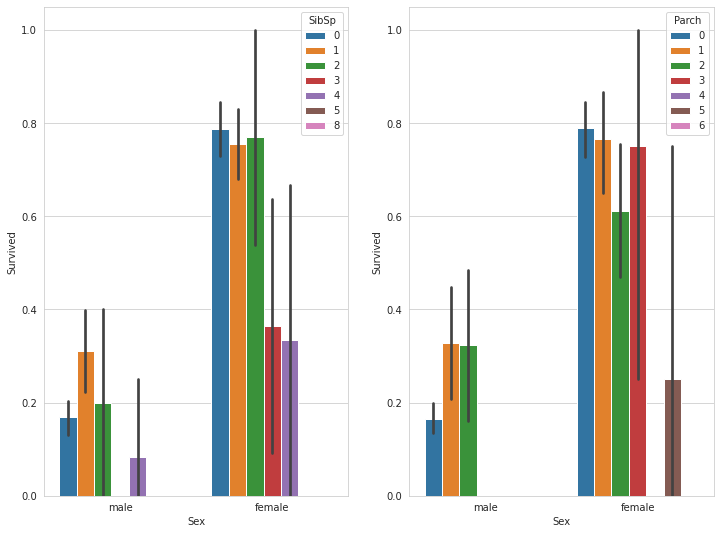

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,9))
sns.barplot(x="Sex", y="Survived", hue="SibSp", data=df, ax=ax1)
sns.barplot(x="Sex", y="Survived", hue="Parch", data=df, ax=ax2)

### 2.1. Exploratory Data Analysis

In [9]:
# Read the file train.csv into Python and print a few rows.

In [10]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

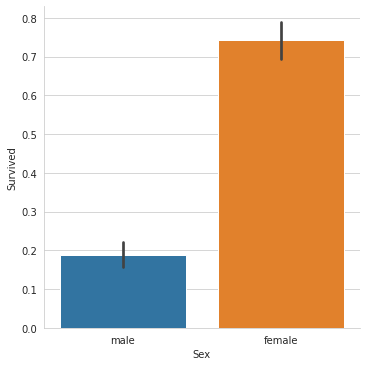

In [11]:
sns.catplot(x="Sex", y="Survived", kind="bar", data=df);

In [12]:
# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

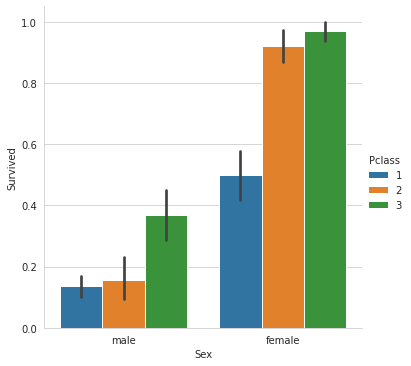

In [13]:
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

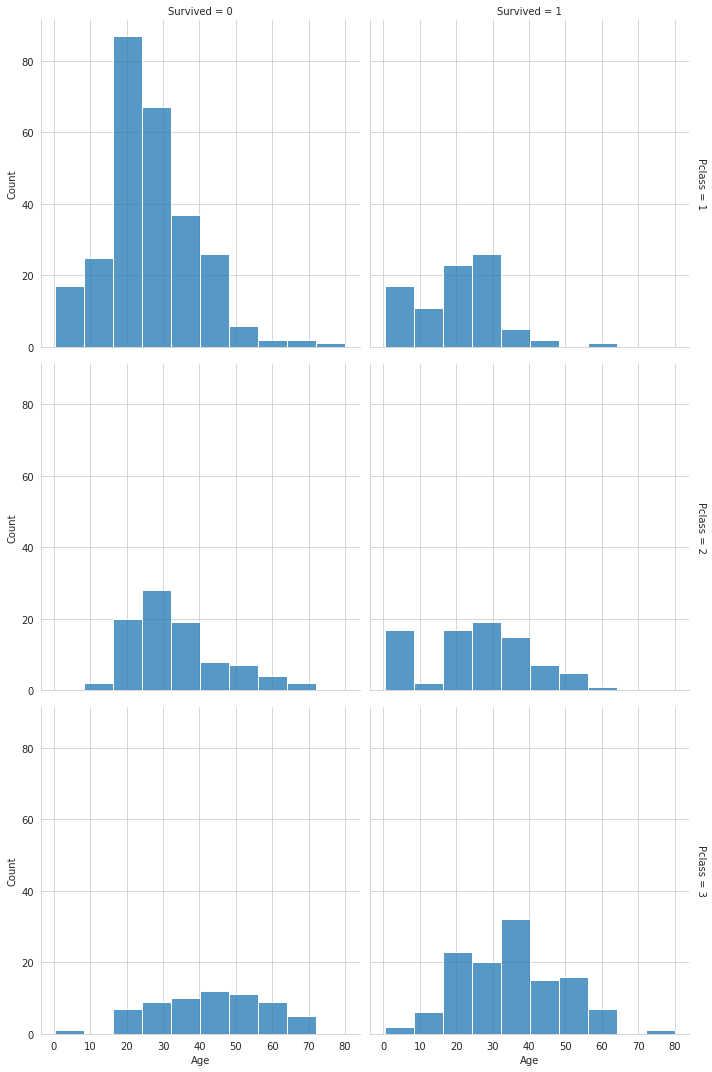

In [14]:
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
sns.displot(df, x="Age", col="Survived", row="Pclass", facet_kws=dict(margin_titles=True), bins=10)

In [15]:
# Calculate the average age for survived and drowned passengers separately.
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [16]:
# Replace missing age values by the mean age.
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,1.691358,0.836071,1.00,1.0000,1.000000,2.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [18]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
pd.crosstab(index=[df['Survived'],df['Pclass']], columns=df['Sex'], margins=True)

Sex              female  male  All
Survived Pclass                   
0        1           72   300  372
         2            6    91   97
         3            3    77   80
1        1           72    47  119
         2           70    17   87
         3           91    45  136
All                 314   577  891

In [19]:
pd.crosstab(index=[df['Survived'],df['Pclass']], columns=df['Sex'], margins=True, normalize=True)

Sex                female      male       All
Survived Pclass                              
0        1       0.080808  0.336700  0.417508
         2       0.006734  0.102132  0.108866
         3       0.003367  0.086420  0.089787
1        1       0.080808  0.052750  0.133558
         2       0.078563  0.019080  0.097643
         3       0.102132  0.050505  0.152637
All              0.352413  0.647587  1.000000

### 2.3.2. Example using Scikit-learn
insert fit, ```linear_model```, ```LogisticRegression``` and ```score``` to make the code work.

In [20]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

X, y = make_moons(n_samples=200, noise=0.3)

m = LogisticRegression(C=1e5)
m.fit(X, y)

print(m.score(X, y))

0.89


In [21]:
#import statsmodels.discrete.discrete_model as sm

#logit = sm.Logit(y, X)
#f = logit.fit()
#print(f.params)
#print(f.summary())

In [22]:
import statsmodels.formula.api as smf
model = smf.logit(formula='Survived ~ Sex + Pclass + Age', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.451923
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Jan 2021   Pseudo R-squ.:                  0.3213
Time:                        17:58:49   Log-Likelihood:                -402.66
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.450e-82
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0581      0.252      0.231      0.817      -0.435       0.551
Sex[T.male]    -2.6120      0.187    -13.997      0.000      -2.978      -2.246
Pclass          1.1685      0.119      9.824      0.000       0.935       1.402
Age            -0.0334      0.007     -4.549      0.000      -0.048      -0.019
===============================================================================
"""